In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer

tweets = pd.read_csv('./dataset/2022 Twitter Tweets Jan-April_Amber Heard Data.csv')
df = pd.DataFrame(tweets)

C:\Users\catharinaa.2019\AppData\Local\Temp\ipykernel_14232\4098228837.py:6: DtypeWarning: Columns (0,4,5,25,29,30,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('./dataset/2022 Twitter Tweets Jan-April_Amber Heard Data.csv')


In [2]:
df_en = df[df["lang"] == "en"]
df_en

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
0,1477504983130116096.0,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,en,1466075642244603909,1363630915298148352.0,"[{'indices': [45, 56], 'text': 'JohnnyDepp'}]","[{'original_info': {'width': 1058, 'focus_rect...",[],[],...,1898.0,NaN,NaN,Sean O'Connor,seano999,https://pbs.twimg.com/profile_banners/11497951...,http://pbs.twimg.com/profile_images/1442389537...,27033.0,NaN,False
1,1477503751716065280.0,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,en,NaN,NaN,[],NaN,[],[],...,1025.0,NaN,NaN,❤️‍🔥 Wilson the Opp Slayer 🔪,WonderWilson18,https://pbs.twimg.com/profile_banners/14262271...,http://pbs.twimg.com/profile_images/1515742990...,27853.0,https://t.co/dVvgQNht1k,False
2,1477499814719983616.0,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,en,1477497121972621318,1297204830231040000.0,[],NaN,[],[],...,139.0,NaN,NaN,Steven Curry,StevenJCurry,https://pbs.twimg.com/profile_banners/14273589...,http://pbs.twimg.com/profile_images/1429534379...,199.0,NaN,False
3,1477497740498292736.0,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,en,1477475212992073728,305017078.0,[],NaN,[],[],...,128.0,NaN,NaN,Vincent 1,Vincent72516869,NaN,http://pbs.twimg.com/profile_images/1354614785...,2313.0,NaN,False
4,1477496477484212224.0,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,en,NaN,NaN,[],NaN,[],[],...,141.0,NaN,𝗡𝗢𝗧 𝗦𝗣𝗢𝗜𝗟𝗘𝗥 𝗙𝗥𝗘𝗘,𝐇𝐘𝐃𝐄,YoonJaysSimp,https://pbs.twimg.com/profile_banners/10769432...,http://pbs.twimg.com/profile_images/1516751870...,5423.0,https://t.co/XkBVR5FDCS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508241,1515570192960659460,2022-04-17 05:57:46+00:00,"@GardenCole First of all, no I did not, though...",en,1515564278417305600.0,1492510921704415232.0,[],NaN,[],[],...,4790,NaN,United States,💛❤️💙🤍treystar679,treystar679,https://pbs.twimg.com/profile_banners/80660615...,http://pbs.twimg.com/profile_images/1500767367...,5831,https://t.co/QylPdKmQVk,False
508242,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,en,NaN,NaN,[],NaN,[],[],...,201,NaN,NaN,ayyy nakoooo,GhelSandra,https://pbs.twimg.com/profile_banners/27013539...,http://pbs.twimg.com/profile_images/1402120521...,30280,https://t.co/KRDaAomcsU,False
508243,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,en,NaN,NaN,[],NaN,[],[],...,154,NaN,NaN,Jeli Bean,lilithrising_,https://pbs.twimg.com/profile_banners/14184202...,http://pbs.twimg.com/profile_images/1516523367...,7863,NaN,False
508245,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",en,NaN,NaN,[],NaN,[],[],...,3214,NaN,"Rockford, Illinois",Jalopy Galopy,Jankem69420,https://pbs.twimg.com/profile_banners/13194711...,http://pbs.twimg.com/profile_images/1427306627...,9171,https://t.co/C6Pn7cxcss,False


In [3]:
df_jan = df_en[(df_en['created_at'] > '2022-01-01') & (df_en['created_at'] < '2022-02-01')]
df_jan

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
0,1477504983130116096.0,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,en,1466075642244603909,1363630915298148352.0,"[{'indices': [45, 56], 'text': 'JohnnyDepp'}]","[{'original_info': {'width': 1058, 'focus_rect...",[],[],...,1898.0,NaN,NaN,Sean O'Connor,seano999,https://pbs.twimg.com/profile_banners/11497951...,http://pbs.twimg.com/profile_images/1442389537...,27033.0,NaN,False
1,1477503751716065280.0,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,en,NaN,NaN,[],NaN,[],[],...,1025.0,NaN,NaN,❤️‍🔥 Wilson the Opp Slayer 🔪,WonderWilson18,https://pbs.twimg.com/profile_banners/14262271...,http://pbs.twimg.com/profile_images/1515742990...,27853.0,https://t.co/dVvgQNht1k,False
2,1477499814719983616.0,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,en,1477497121972621318,1297204830231040000.0,[],NaN,[],[],...,139.0,NaN,NaN,Steven Curry,StevenJCurry,https://pbs.twimg.com/profile_banners/14273589...,http://pbs.twimg.com/profile_images/1429534379...,199.0,NaN,False
3,1477497740498292736.0,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,en,1477475212992073728,305017078.0,[],NaN,[],[],...,128.0,NaN,NaN,Vincent 1,Vincent72516869,NaN,http://pbs.twimg.com/profile_images/1354614785...,2313.0,NaN,False
4,1477496477484212224.0,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,en,NaN,NaN,[],NaN,[],[],...,141.0,NaN,𝗡𝗢𝗧 𝗦𝗣𝗢𝗜𝗟𝗘𝗥 𝗙𝗥𝗘𝗘,𝐇𝐘𝐃𝐄,YoonJaysSimp,https://pbs.twimg.com/profile_banners/10769432...,http://pbs.twimg.com/profile_images/1516751870...,5423.0,https://t.co/XkBVR5FDCS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,1479736326085824518,2022-01-08 08:46:46+00:00,@RoniCovfefe I think the last time the US coll...,en,1479602325358473216.0,1246677131481853952.0,[],NaN,[],[],...,28,NaN,NaN,torben poulsen,torbenhp,NaN,http://abs.twimg.com/sticky/default_profile_im...,1542,NaN,False
18896,1479735816800944132,2022-01-08 08:44:45+00:00,@33RecordedTimes Judge Azcarate in Virginia wa...,en,1479508658287362048.0,954368696742531200.0,"[{'indices': [69, 80], 'text': 'JohnnyDepp'}, ...","[{'original_info': {'width': 1334, 'focus_rect...",[],[],...,916,NaN,Suisse,🍩🦙🦙🦙🍉M.G. Warrior Of Johnny Depp ⚖Wald-Mignon,mg_violette,https://pbs.twimg.com/profile_banners/41947550...,http://pbs.twimg.com/profile_images/1502655708...,69496,https://t.co/6gZJr3a5PU,False
18897,1479735675800985604,2022-01-08 08:44:11+00:00,@Daixess amber heard moment,en,1479675810130890752.0,1138228587318906752.0,[],NaN,[],[],...,28,NaN,in your head or behind you,K.M.M.A,KMMA3,https://pbs.twimg.com/profile_banners/13850156...,http://pbs.twimg.com/profile_images/1410368361...,11551,NaN,False
18898,1479735049427857408,2022-01-08 08:41:42+00:00,@33RecordedTimes @FryingPan67 And what do you ...,en,1479734629041061888.0,4194755003.0,"[{'indices': [134, 145], 'text': 'JohnnyDepp'}...","[{'original_info': {'width': 1247, 'focus_rect...",[],[],...,916,NaN,Suisse,🍩🦙🦙🦙🍉M.G. Warrior Of Johnny Depp ⚖Wald-Mignon,mg_violette,https://pbs.twimg.com/profile_banners/41947550...,http://pbs.twimg.com/profile_images/1502655708...,69496,https://t.co/6gZJr3a5PU,False


In [4]:
df_feb = df_en[(df_en['created_at'] > '2022-02-01') & (df_en['created_at'] < '2022-03-01')]
df_feb

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
18900,1495987453118885891,2022-02-22 05:02:57+00:00,4. My vote for #Minamata\n#OscarsFanFavorite \...,en,NaN,NaN,"[{'indices': [15, 24], 'text': 'Minamata'}, {'...","[{'original_info': {'width': 1080, 'focus_rect...",[],[],...,1630,NaN,"Greenville, SC",Libby 🐝🏴‍☠️🥚 #JusticeForJohnnyDepp,DeppSoldier_22,https://pbs.twimg.com/profile_banners/93222919...,http://pbs.twimg.com/profile_images/1519175010...,52949,https://t.co/6uTr49nrUp,False
18901,1495987275146174465,2022-02-22 05:02:15+00:00,3. My vote for #Minamata\n#OscarsFanFavorite \...,en,NaN,NaN,"[{'indices': [15, 24], 'text': 'Minamata'}, {'...","[{'original_info': {'width': 455, 'focus_rects...",[],[],...,1630,NaN,"Greenville, SC",Libby 🐝🏴‍☠️🥚 #JusticeForJohnnyDepp,DeppSoldier_22,https://pbs.twimg.com/profile_banners/93222919...,http://pbs.twimg.com/profile_images/1519175010...,52949,https://t.co/6uTr49nrUp,False
18902,1495987151124807686,2022-02-22 05:01:45+00:00,2. My vote for #Minamata\n#OscarsFanFavorite \...,en,NaN,NaN,"[{'indices': [15, 24], 'text': 'Minamata'}, {'...","[{'original_info': {'width': 1280, 'focus_rect...",[],[],...,1630,NaN,"Greenville, SC",Libby 🐝🏴‍☠️🥚 #JusticeForJohnnyDepp,DeppSoldier_22,https://pbs.twimg.com/profile_banners/93222919...,http://pbs.twimg.com/profile_images/1519175010...,52949,https://t.co/6uTr49nrUp,False
18903,1495986895540662275,2022-02-22 05:00:44+00:00,1. My vote for #Minamata\n#OscarsFanFavorite \...,en,NaN,NaN,"[{'indices': [15, 24], 'text': 'Minamata'}, {'...","[{'original_info': {'width': 569, 'focus_rects...",[],[],...,1630,NaN,"Greenville, SC",Libby 🐝🏴‍☠️🥚 #JusticeForJohnnyDepp,DeppSoldier_22,https://pbs.twimg.com/profile_banners/93222919...,http://pbs.twimg.com/profile_images/1519175010...,52949,https://t.co/6uTr49nrUp,False
18908,1495975430741970945,2022-02-22 04:15:11+00:00,Amber heard should go to jail and stop being c...,en,NaN,NaN,[],NaN,[],[],...,185,NaN,NaN,Cas击,caseyspencers,https://pbs.twimg.com/profile_banners/14613608...,http://pbs.twimg.com/profile_images/1463517113...,224,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40712,1495111519754985477,2022-02-19 19:02:18+00:00,@712Allyana Christina Ricci supports Amber Hea...,en,1495075702445588480.0,4850631346.0,[],NaN,[],[],...,43,NaN,NaN,aniroc,aniroc5,NaN,http://abs.twimg.com/sticky/default_profile_im...,589,NaN,False
40713,1495111428948348929,2022-02-19 19:01:57+00:00,"Rules⤵️ but add a 📷 a text, a gif a number to ...",en,NaN,NaN,"[{'indices': [83, 94], 'text': 'JohnnyDepp'}, ...","[{'original_info': {'width': 847, 'focus_rects...",[],[],...,116,NaN,NaN,p60p45,P60P45,https://pbs.twimg.com/profile_banners/93987488...,http://pbs.twimg.com/profile_images/1503092168...,14266,NaN,False
40714,1495111212492804101,2022-02-19 19:01:05+00:00,Amber Heard in a Black Jacket Was Seen Out in ...,en,NaN,NaN,[],NaN,[],[{'display_url': 'onceleb.wiki/amber-heard-in…...,...,0,NaN,NaN,Hot Celebs,HotCele82324320,NaN,http://pbs.twimg.com/profile_images/1299336670...,11971,NaN,False
40715,1495110385631993859,2022-02-19 18:57:48+00:00,@doggykitty143 @lilmissaurora1 Court of Appeal...,en,1495093334251036672.0,1491122979090034688.0,[],"[{'original_info': {'width': 828, 'focus_rects...",[],[],...,474,NaN,Scotland,🏴󠁧󠁢󠁳󠁣󠁴󠁿 Thistle 🏴󠁧󠁢󠁳󠁣󠁴󠁿,HyslopKayleigh,https://pbs.twimg.com/profile_banners/13240782...,http://pbs.twimg.com/profile_images/1519640892...,7572,NaN,False


In [5]:
df_mar = df_en[(df_en['created_at'] > '2022-03-01') & (df_en['created_at'] < '2022-04-01')]
df_mar

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
40717,1501160198202961920,2022-03-08 11:37:36+00:00,@la77465262 Just because she is a woman should...,en,1501159289569824768.0,1363630915298148352.0,"[{'indices': [92, 110], 'text': 'AmberHeardIsA...",NaN,[],[],...,140,NaN,Ireland,Catherine Houston,catheri39707230,https://pbs.twimg.com/profile_banners/14875450...,http://pbs.twimg.com/profile_images/1519042268...,4731,NaN,False
40718,1501157581112418313,2022-03-08 11:27:12+00:00,We aren’t just talking a violent phase over a ...,en,1501157256708202496.0,1410870605910585088.0,"[{'indices': [206, 227], 'text': 'JusticeforJo...",NaN,[],[],...,164,NaN,"London, England",JusticeforJohnnyDepp✊🏻 (Soph),JDepp94,https://pbs.twimg.com/profile_banners/14108706...,http://pbs.twimg.com/profile_images/1502943790...,3984,NaN,False
40719,1501156722399973378,2022-03-08 11:23:47+00:00,"After claiming he would, he had medical record...",en,1501156456279814144.0,1410870605910585088.0,"[{'indices': [203, 224], 'text': 'JusticeforJo...",NaN,[],[],...,164,NaN,"London, England",JusticeforJohnnyDepp✊🏻 (Soph),JDepp94,https://pbs.twimg.com/profile_banners/14108706...,http://pbs.twimg.com/profile_images/1502943790...,3984,NaN,False
40720,1501156257751007232,2022-03-08 11:21:56+00:00,Judge pls see THIS . \n#JusticeForJohnnyDeppVi...,en,NaN,NaN,"[{'indices': [22, 55], 'text': 'JusticeForJohn...",NaN,[],[],...,997,NaN,"Kolkata, India",Rup_1092,Rupsa_Srk555,https://pbs.twimg.com/profile_banners/31697382...,http://pbs.twimg.com/profile_images/1517454667...,10094,NaN,False
40721,1501156224481517568,2022-03-08 11:21:48+00:00,So @wbpictures @warnerbros DOESN'T want us to...,en,NaN,NaN,"[{'indices': [136, 154], 'text': 'AmberHeardIs...",NaN,[],[],...,575,NaN,My Imagination,°san°🏴‍☠️JusticeForJohnnyDepp°💜,s_sans_s,https://pbs.twimg.com/profile_banners/13580682...,http://pbs.twimg.com/profile_images/1486479429...,13386,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,1504348904027930624,2022-03-17 06:48:22+00:00,@RhodesiaP3 @JasonTheLib @jk_rowling They repl...,en,1504341476028805120.0,1457545636887269376.0,[],NaN,[],[],...,1000,NaN,"Nevada, USA",Eric Stutz 🇺🇸,eric_stutzman5,https://pbs.twimg.com/profile_banners/92701182...,http://pbs.twimg.com/profile_images/1415847122...,42275,NaN,False
66900,1504348565723828224,2022-03-17 06:47:02+00:00,@An_elf_pirate She is going to present them as...,en,1504195186204856320.0,953077628059225984.0,"[{'indices': [109, 142], 'text': 'JusticeForJo...","[{'original_info': {'width': 244, 'height': 18...",[],[],...,1100,NaN,Mèxico,ROSE,RosePagaza,https://pbs.twimg.com/profile_banners/87623545...,http://pbs.twimg.com/profile_images/1516252901...,16007,https://t.co/lSTnJCfVgJ,False
66902,1504347838733561856,2022-03-17 06:44:08+00:00,@ZellnerLaw Please bring him the justice he de...,en,1504299212590133248.0,347320239.0,"[{'indices': [137, 158], 'text': 'JusticeForJo...",NaN,[],[],...,374,NaN,"Manchester, England",RoyaltiD #DeppWarriors,d_royalti,https://pbs.twimg.com/profile_banners/12957739...,http://pbs.twimg.com/profile_images/1502685132...,11653,NaN,False
66903,1504346634422992898,2022-03-17 06:39:21+00:00,Interesting witness list from Amber Heard for ...,en,NaN,NaN,"[{'indices': [46, 79], 'text': 'JusticeForJohn...",NaN,[],[],...,602,NaN,istanbul,ayca gurelman,IstanbulYoga,https://pbs.twimg.com/profile_banners/54476159...,http://pbs.twimg.com/profile_images/1315234505...,10929,https://t.co/CrM3bHqii5,False


In [6]:
df_apr = df_en[(df_en['created_at'] > '2022-04-01') & (df_en['created_at'] < '2022-05-01')]
df_apr

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
66905,1515259868701204481,2022-04-16 09:24:39+00:00,Amber Heard 'spat' in former assistant's face ...,en,NaN,NaN,[],NaN,[],"[{'display_url': 'ift.tt/kwGQ75A', 'indices': ...",...,3106,NaN,"Allen, Nigeria",EmpressiveNaija,EmpressiveNaija,https://pbs.twimg.com/profile_banners/14181125...,http://pbs.twimg.com/profile_images/1376256395...,42197,https://t.co/rXyNMyBt1K,False
66907,1515259512407609347,2022-04-16 09:23:14+00:00,"Great for bruises, black eyes, broken lips, ef...",en,NaN,NaN,"[{'indices': [257, 278], 'text': 'JusticeForJo...","[{'original_info': {'width': 2048, 'focus_rect...",[],[],...,459,NaN,livorno,deborah bracciotti,deborahbracciot,https://pbs.twimg.com/profile_banners/46394125...,http://pbs.twimg.com/profile_images/1504568479...,853,NaN,False
66912,1515259372875792385,2022-04-16 09:22:41+00:00,Fantastic beasts were amazing imo. You should ...,en,NaN,NaN,"[{'indices': [196, 217], 'text': 'JusticeForJo...",NaN,[],[],...,52,NaN,NaN,Mimi,mimisameme,https://pbs.twimg.com/profile_banners/15152448...,http://pbs.twimg.com/profile_images/1519218100...,46,NaN,False
66913,1515259347726745612,2022-04-16 09:22:35+00:00,@warnerbros SHE'S ADMITTED TO HITTING HIM. #bo...,en,NaN,23560015.0,"[{'indices': [43, 59], 'text': 'boycottaquaman...",NaN,[],[],...,1062,NaN,"Texas, USA",Tommi Michelle Ivey,beatlebabe2000,https://pbs.twimg.com/profile_banners/20630200...,http://pbs.twimg.com/profile_images/1190837519...,6195,NaN,False
66914,1515259219943034890,2022-04-16 09:22:04+00:00,"I'm still on my man Jonny Depps side, not just...",en,NaN,NaN,[],NaN,[],[],...,511,NaN,NaN,Wil 3D,Atarian_X,https://pbs.twimg.com/profile_banners/27178007...,http://pbs.twimg.com/profile_images/1518944926...,18967,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508241,1515570192960659460,2022-04-17 05:57:46+00:00,"@GardenCole First of all, no I did not, though...",en,1515564278417305600.0,1492510921704415232.0,[],NaN,[],[],...,4790,NaN,United States,💛❤️💙🤍treystar679,treystar679,https://pbs.twimg.com/profile_banners/80660615...,http://pbs.twimg.com/profile_images/1500767367...,5831,https://t.co/QylPdKmQVk,False
508242,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,en,NaN,NaN,[],NaN,[],[],...,201,NaN,NaN,ayyy nakoooo,GhelSandra,https://pbs.twimg.com/profile_banners/27013539...,http://pbs.twimg.com/profile_images/1402120521...,30280,https://t.co/KRDaAomcsU,False
508243,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,en,NaN,NaN,[],NaN,[],[],...,154,NaN,NaN,Jeli Bean,lilithrising_,https://pbs.twimg.com/profile_banners/14184202...,http://pbs.twimg.com/profile_images/1516523367...,7863,NaN,False
508245,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",en,NaN,NaN,[],NaN,[],[],...,3214,NaN,"Rockford, Illinois",Jalopy Galopy,Jankem69420,https://pbs.twimg.com/profile_banners/13194711...,http://pbs.twimg.com/profile_images/1427306627...,9171,https://t.co/C6Pn7cxcss,False


In [30]:
# import datetime
# test = datetime.datetime.strptime(df2.loc[0]['created_at'].split()[0], '%Y-%m-%d').date().month
# print(test)
# print(test.month)

1


In [44]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item

tweet_text_list_jan = df_jan['full_text'].tolist()

tweet_text_list_jan

["@la77465262 @Melinda15199317 @Dior So why is #JohnnyDepp only bringing a civil case against Amber Heard? Because he knows his evidence won't stand up in criminal court! Johnny's just wasting his money! His reputation is shot. His own fault for bringing the case in UK. Even the stans say it's a waste of time! 😂 https://t.co/JcUseKVN0s",
 'Only thing I want them to leave alone is the first Wonder Woman movie. They need to completely redo phase 1 and also take Amber Heard out of future Aquaman films',
 "@soldierboy43001 @ZakReckless Yeah but Snyder isn't involved in the Flash so why would he care. Same with Amber Heard.",
 '@IIMissMax @bg98021 @GerberKawasaki You forgot he hook up with amber heard . I am sure he can find someone when he is stress out',
 'I never seen Aquaman nor will I because Amber Heard….',
 '@neutral_as_eff @TinseltownMayor @RSTSnyderVerse @jessika7979 Gonna go ahead and be charitable here to both of you, I think he meant Amber Heard and got the name wrong',
 'Excell

In [7]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item

tweet_text_list_feb = df_feb['full_text'].tolist()

tweet_text_list_feb

['4. My vote for #Minamata\n#OscarsFanFavorite \n#Sweepstakes \n#JusticeForJohnnyDepp https://t.co/JbtzbHIevQ',
 '3. My vote for #Minamata\n#OscarsFanFavorite \n#Sweepstakes \n#JusticeForJohnnyDepp https://t.co/umiFKiSZRe',
 '2. My vote for #Minamata\n#OscarsFanFavorite \n#Sweepstakes \n#JusticeForJohnnyDepp https://t.co/1WtHLFy3YK',
 '1. My vote for #Minamata\n#OscarsFanFavorite \n#Sweepstakes \n#JusticeForJohnnyDepp https://t.co/57NbaI9BxI',
 'Amber heard should go to jail and stop being cast in movies. Abusers should go to jail not get pay checks',
 'mf abused Johnny and this person says "don\'t body shame amber heard its vewwy wong and thats whewe the wine is dwan uwu" bullshit',
 'Still love Mera and still love Amber Heard. Idgaf about your opinion on the matter',
 'https://t.co/Pz61fNZ1d9\n⤵️\nReminder of Amber Heard as the abuser, who falsely accused Johnny Depp.\n#JusticeForJohnnyDeppVirginia2022',
 "@RawbertBeef Huh? Who's body-shaming Amber Heard? She has a great body. 🤔",
 '

In [45]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [8]:
'''
Text Preprocessing: From Start to Finish

I hope you understand the steps I have explained above.
Now we can combine all those lines of code into one function that we can
call and pass an argument to.

The function then returns a clean text that is ready for you to work with.

Keep in mind that the order of steps here are not absolute.
You can arrange them around depending on your text and your needs.
The code below is what I found to be the most effective on the data I
usually work with, but in case you find another pattern of data,
you can always work them out differently.
'''
import numpy as np
import re

stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
# tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
#     temp = re.sub(r" s ","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = [lemmatizer.lemmatize(w) for w in temp]

#     temp = [(lemmatizer.lemmatize(w, tag_dict.get(nltk.pos_tag([w])[0][1][0].upper(), wordnet.NOUN))) for w in temp]
    
    temp = " ".join(word for word in temp)
    return temp

In [49]:
# Let's go and apply this to our own tweets
my_results_jan = [clean_tweet(tw) for tw in tweet_text_list_jan]
my_results_jan

['bringing civil case know evidence wont stand criminal court wasting money reputation shot fault bringing case uk even stans say waste time',
 'thing want leave alone first wonder woman movie need completely redo phase 1 also take future aquaman film',
 'ye snyder isnt involved flash would care',
 'forgot hook sure find someone stress',
 'never seen aquaman',
 'gonna go ead charitable think meant got name wrong',
 'excellent fan art',
 'yes',
 'literally someone saying boycott aquaman 2 flash ezra miller besties anything come dc',
 'newest receipt courtesy thank jon',
 'see aquaman trending reminder abuser boycotting aquaman 2 come unless support abuser watch movie illegally must mutually abusive relationship relationship myth',
 'drop might see happen',
 'abusive housekeeper found deal',
 'mr joyce australian authority stop seeking attention back accept fact one smuggled dog committed perjury forced others lie thats charged two celebrity',
 'tryin forgive self goin ead switchin heat 

In [9]:
lemmatizer = nltk.stem.WordNetLemmatizer()
# tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemm(tweet):
#     temp = tweet.split()
#     temp = [(lemmatizer.lemmatize(w, tag_dict.get(nltk.pos_tag([w])[0][1][0].upper(), wordnet.NOUN))) for w in temp]
    temp = []
    nltk_tagged = nltk.pos_tag(tweet.split())
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    for word, tag in wordnet_tagged:
        if tag is None:
            temp.append(word) 
        else: 
            temp.append(lemmatizer.lemmatize(word, tag))
            
    temp = " ".join(word for word in temp)
    return temp

In [59]:
my_results2_jan = [lemm(tw) for tw in my_results_jan]
my_results2_jan

['bring civil case know evidence wont stand criminal court waste money reputation shot fault bring case uk even stans say waste time',
 'thing want leave alone first wonder woman movie need completely redo phase 1 also take future aquaman film',
 'ye snyder isnt involve flash would care',
 'forgot hook sure find someone stress',
 'never see aquaman',
 'gonna go ead charitable think mean get name wrong',
 'excellent fan art',
 'yes',
 'literally someone say boycott aquaman 2 flash ezra miller besties anything come dc',
 'new receipt courtesy thank jon',
 'see aquaman trend reminder abuser boycott aquaman 2 come unless support abuser watch movie illegally must mutually abusive relationship relationship myth',
 'drop might see happen',
 'abusive housekeeper find deal',
 'mr joyce australian authority stop seek attention back accept fact one smuggle dog committed perjury force others lie thats charge two celebrity',
 'tryin forgive self goin ead switchin heat light bulb time night blow fro

In [10]:
my_results_feb = [clean_tweet(tw) for tw in tweet_text_list_feb]
my_results2_feb = [lemm(tw) for tw in my_results_feb]

In [14]:
tweet_text_list_mar = df_mar['full_text'].tolist()
my_results_mar = [clean_tweet(tw) for tw in tweet_text_list_mar]
my_results2_mar = [lemm(tw) for tw in my_results_mar]

In [17]:
tweet_text_list_apr = df_apr['full_text'].tolist()
my_results_apr = [clean_tweet(tw) for tw in tweet_text_list_apr]
my_results2_apr = [lemm(tw) for tw in my_results_apr]

# January Wordcloud

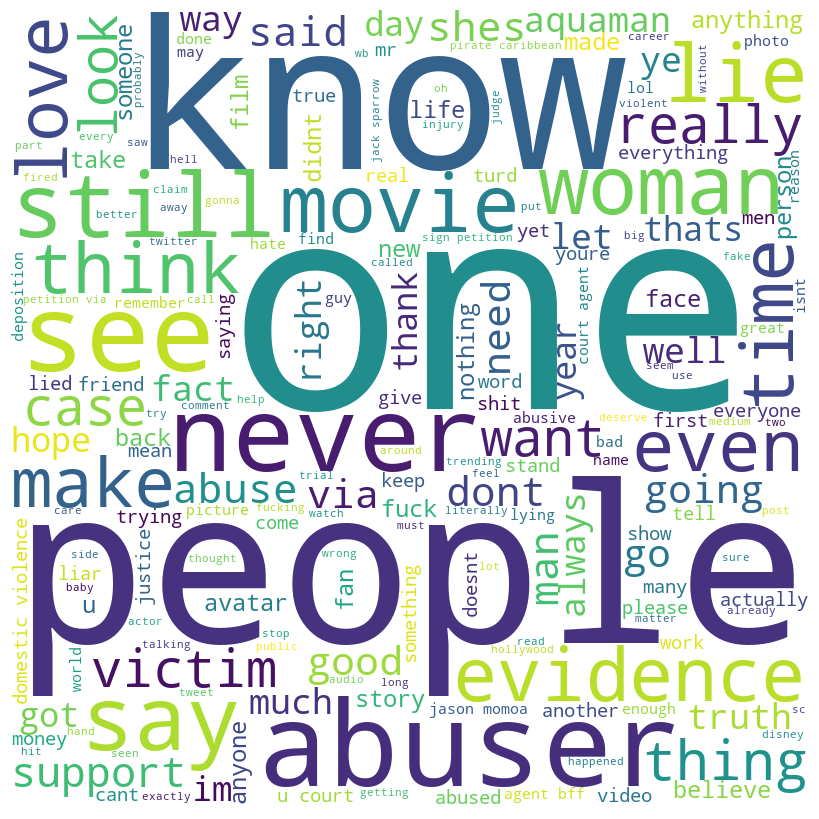

In [50]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results_jan:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

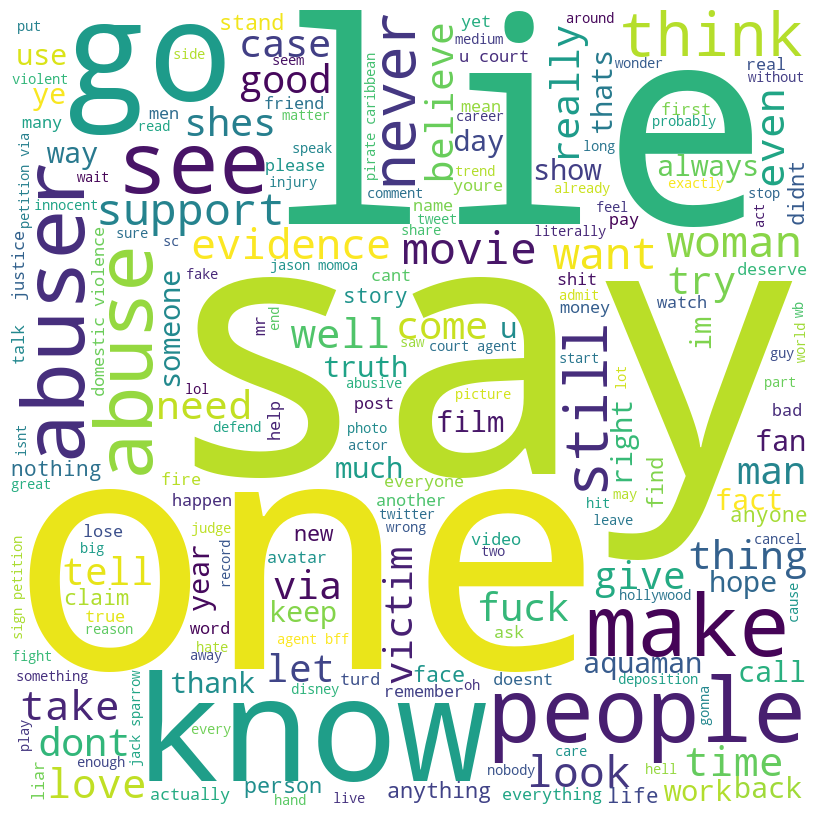

In [60]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_jan:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# February Wordcloud

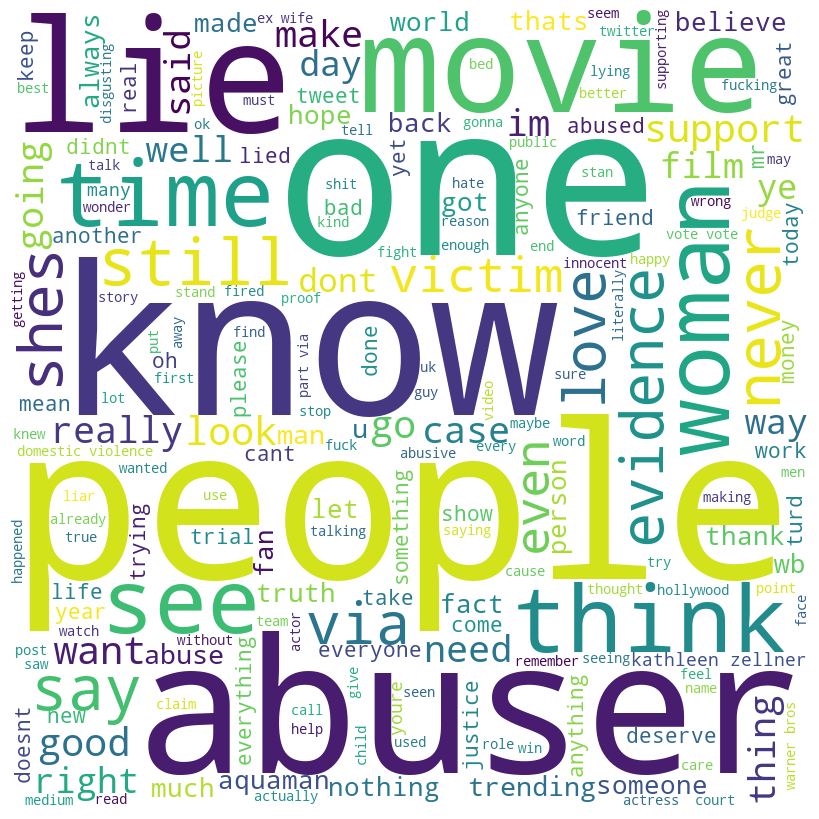

In [11]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results_feb:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

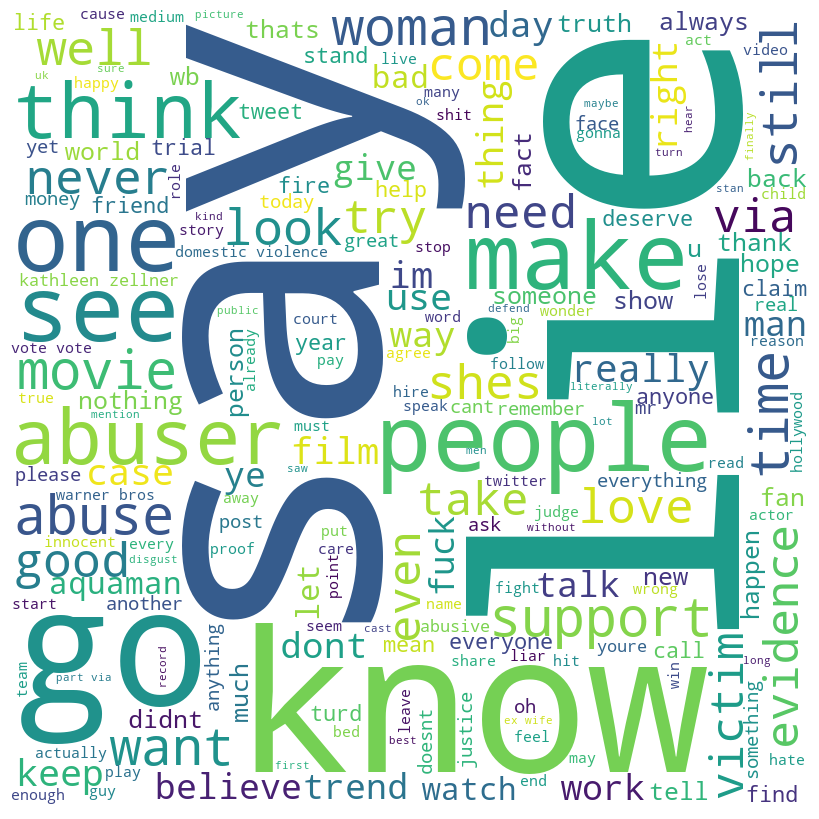

In [12]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_feb:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# March Wordcloud

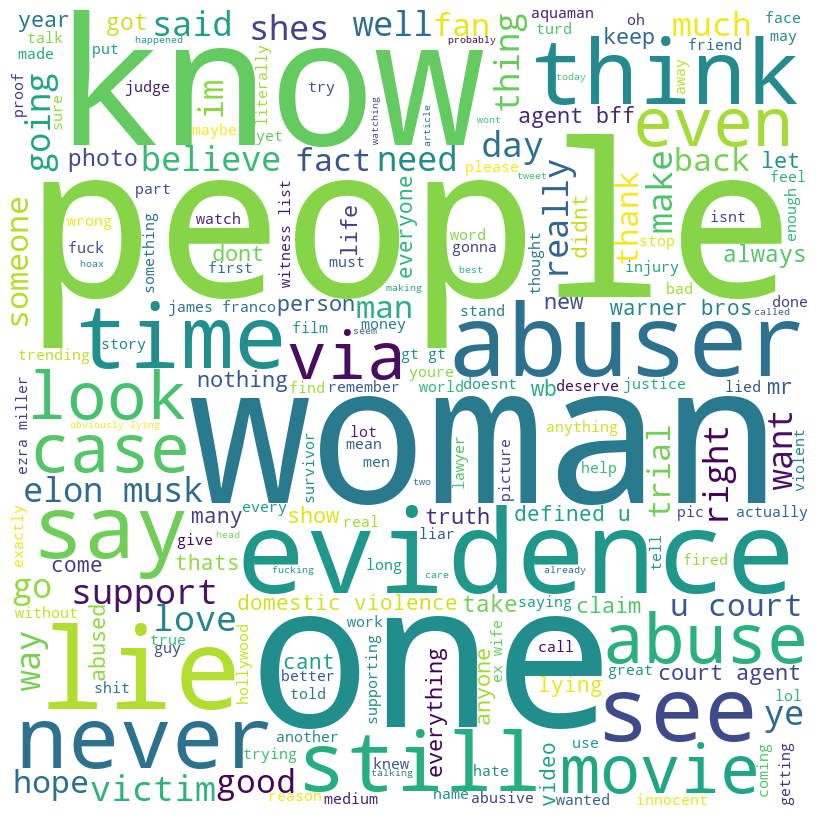

In [15]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results_mar:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

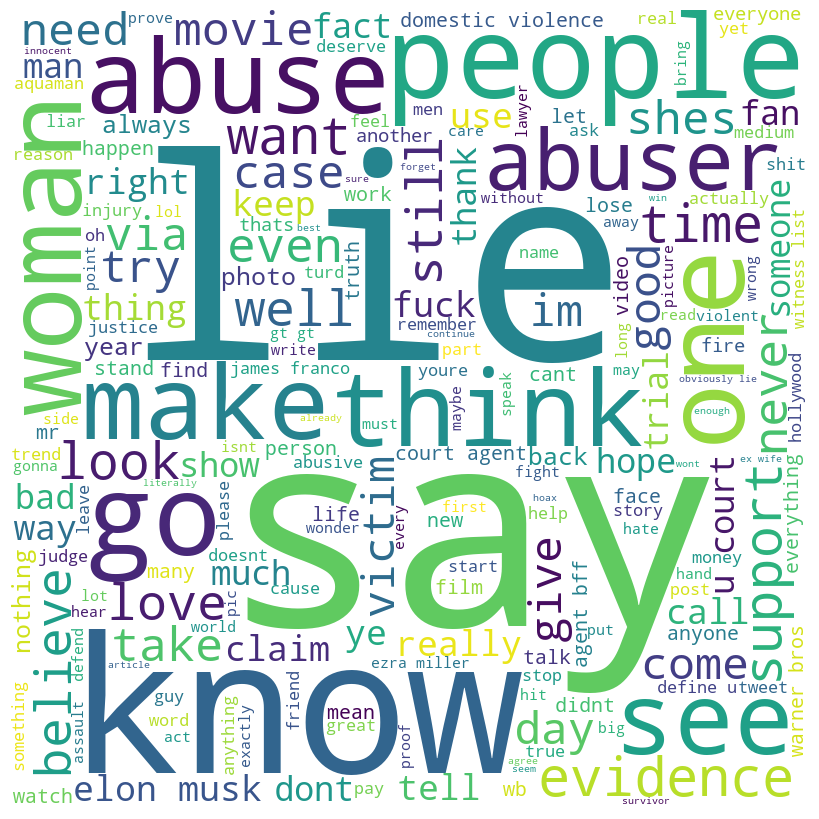

In [16]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_mar:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# April Wordcloud

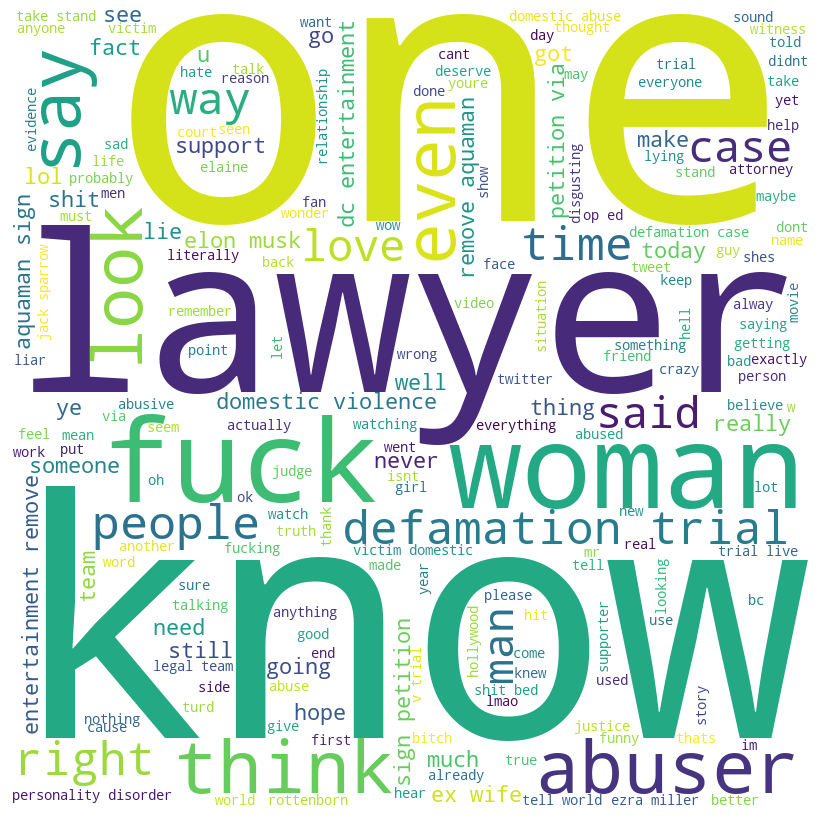

In [18]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results_apr:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

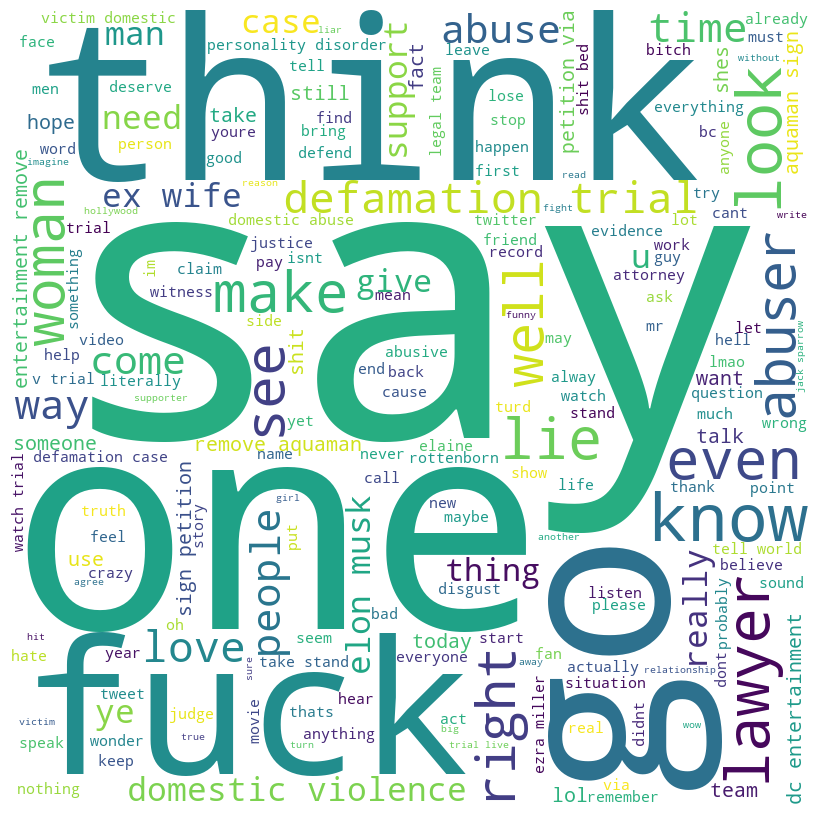

In [20]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results2_apr:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()